In [1]:
from numpy import *
from scipy.stats import norm
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Pricing a European option using Black-Scholes formula and Monte Carlo simulations 
# Pricing a Barrier option using Monte Carlo simulations

S0 = 100     # spot price of the underlying stock today
K = 105      # strike at expiry
mu = 0.05    # expected return
sigma = 0.2  # volatility
r = 0.05     # risk-free rate
T = 1.0      # years to expiry
Sb = 110     # barrier

In [3]:
# Complete the following functions
def BS_european_price(S0, K, T, r, sigma):
    t = 0
    d1 = (np.log(S0/K) + (r + (sigma**2)/2) * (T-t)) / (sigma * np.sqrt(T-t))
    d2 = d1 - sigma * (np.sqrt(T-t))
    c = norm.cdf(d1) * S0 - norm.cdf(d2) * K * (np.exp(-r * (T-t)))
    p = norm.cdf(-d2) * K * (np.exp(-r * (T-t))) - norm.cdf(-d1) * S0
    return c, p

def MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths):
    np.random.seed(100)
    paths = np.zeros((numSteps + 1, numPaths))
    
    # time increment
    dt = T / numSteps
    # initial price
    paths[0] = [S0] * numPaths
    
    for n in range(numPaths):
        for m in range(numSteps):
            paths[m+1,n] = paths[m,n]*np.exp((mu-0.5*sigma**2)*dt + sigma * np.sqrt(dt)*np.random.normal(0,1))
    
    # Calculate payoff
    CpayoffT = np.zeros((numPaths,1))
    PpayoffT = np.zeros((numPaths,1))
    
    for n in range(numPaths):
        CpayoffT[n]  = np.maximum(paths[numSteps,n]-K,0)*np.exp(-r*T)
        PpayoffT[n] = np.maximum(K-paths[numSteps,n],0)*np.exp(-r*T)
        
    c = np.mean(CpayoffT)
    p = np.mean(PpayoffT)
    
    return c, p, paths

def MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths):
    np.random.seed(100)
    paths = np.zeros((numSteps + 1, numPaths))
    
    # Calculate the time increment
    dt = T / numSteps
    
    # Initialize the first row of the paths array to the initial asset price S0
    paths[0] = [S0] * numPaths
    
    # Generate the simulated paths for the asset using the GBM method
    for n in range(numPaths):
        for m in range(numSteps):
            paths[m+1,n] = paths[m,n] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * np.random.normal(0,1))

    CpayoffT = np.zeros((numPaths,1))
    PpayoffT = np.zeros((numPaths,1))
    ba = np.zeros((numPaths,1))
    
    # Determine the payoff of the option at expiration for each path, as well as the number of paths that hit the barrier
    for n in range(numPaths):
        ba[n] = np.sum(paths[:,n] >= Sb) # The number of paths that hit the barrier
        if ba[n] > 0: 
            CpayoffT[n] = np.maximum(paths[numSteps,n] - K, 0) * np.exp(-r * T) # Calculate the call option payoff
            PpayoffT[n] = np.maximum(K - paths[numSteps,n], 0) * np.exp(-r * T) # Calculate the put option payoff
        else: # If the barrier is not hit on this path
            CpayoffT[n] = 0 
            PpayoffT[n] = 0 
    
    # Calculate the mean payoff of the call and put options
    c = np.mean(CpayoffT)
    p = np.mean(PpayoffT)
    
    return c, p

In [4]:
# Define variable numSteps to be the number of steps for multi-step MC
# numPaths - number of sample paths used in simulations

numSteps = 10;
numPaths = 1000000;

# Implement your Black-Scholes pricing formula
call_BS_European_Price, putBS_European_Price = BS_european_price(S0, K, T, r, sigma)

# Implement your one-step Monte Carlo pricing procedure for European option
callMC_European_Price_1_step, putMC_European_Price_1_step, Paths_1 = MC_european_price(S0, K, T, r, mu, sigma, 1, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for European option
callMC_European_Price_multi_step, putMC_European_Price_multi_step, Paths_multi = MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths)

# Implement your one-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_1_step, putMC_Barrier_Knockin_Price_1_step = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, 1, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_multi_step, putMC_Barrier_Knockin_Price_multi_step = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths)

print('Black-Scholes price of an European call option is ' + str(call_BS_European_Price))
print('Black-Scholes price of an European put option is ' + str(putBS_European_Price))
print('One-step MC price of an European call option is ' + str(callMC_European_Price_1_step)) 
print('One-step MC price of an European put option is ' + str(putMC_European_Price_1_step)) 
print('Multi-step MC price of an European call option is ' + str(callMC_European_Price_multi_step)) 
print('Multi-step MC price of an European put option is ' + str(putMC_European_Price_multi_step)) 
print('One-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step)) 
print('One-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step)) 
print('Multi-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step)) 
print('Multi-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step))


Black-Scholes price of an European call option is 8.021352235143176
Black-Scholes price of an European put option is 7.9004418077181455
One-step MC price of an European call option is 8.009488624771356
One-step MC price of an European put option is 7.89118078327349
Multi-step MC price of an European call option is 8.00956163397576
Multi-step MC price of an European put option is 7.899607266229595
One-step MC price of an Barrier call option is 7.7979440445225965
One-step MC price of an Barrier put option is 0.0
Multi-step MC price of an Barrier call option is 7.941839061421007
Multi-step MC price of an Barrier put option is 1.1911028891687918


### One-Step MC for European Option

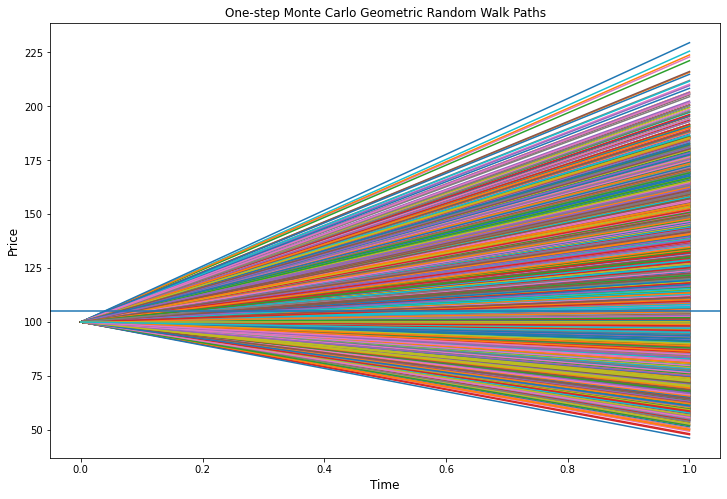

In [22]:
plt.figure(figsize = (12,8))
plt.plot(Paths_1[:,:50000])
plt.title('One-step Monte Carlo Geometric Random Walk Paths')
plt.axhline(y=105)
plt.ylabel("Price", fontsize=12)
plt.xlabel("Time", fontsize=12)
plt.show()

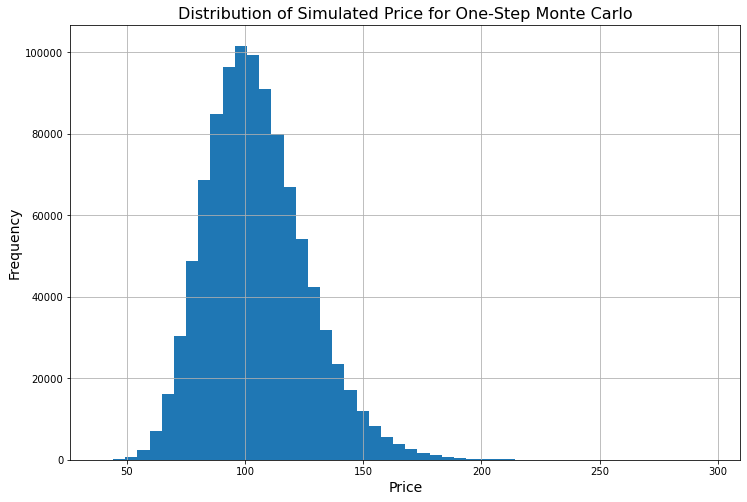

In [24]:
fig = plt.figure(figsize=(12,8))
plt.hist(Paths_1[-1,:], bins=50)
plt.title('Distribution of Simulated Price for One-Step Monte Carlo', fontsize=16)
plt.grid(True)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

### Multi-Steps MC for European Option

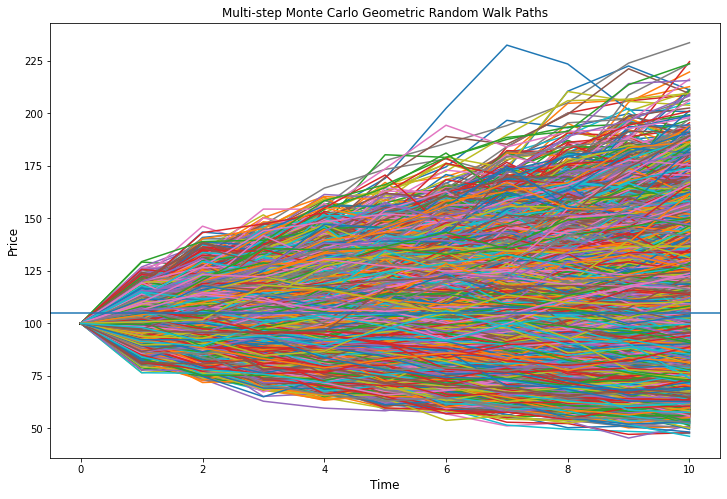

In [23]:
plt.figure(figsize = (12,8))
plt.plot(Paths_multi[:,:50000])
plt.title('Multi-step Monte Carlo Geometric Random Walk Paths')
plt.axhline(y=105)
plt.ylabel("Price", fontsize=12)
plt.xlabel("Time", fontsize=12)
plt.show()

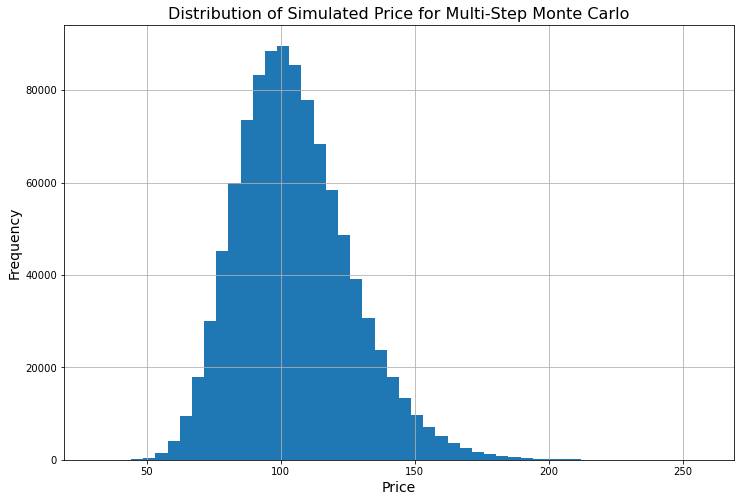

In [18]:
fig = plt.figure(figsize=(12,8))
plt.hist(Paths_multi[-1,:], bins=50)
plt.title('Distribution of Simulated Price for Multi-Step Monte Carlo', fontsize=16)
plt.grid(True)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

### Prices of Barrier options with volatility increased and decreased by 10% from the original inputs.

In [8]:
# Volatility increased by 10%
callMC_Barrier_Knockin_Price_1_step_In, putMC_Barrier_Knockin_Price_1_step_In = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, 1.1*sigma, 1, numPaths)
callMC_Barrier_Knockin_Price_multi_step_In, putMC_Barrier_Knockin_Price_multi_step_In = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, 1.1*sigma, numSteps, numPaths)



# Volatility decreased by 10%
callMC_Barrier_Knockin_Price_1_step_De, putMC_Barrier_Knockin_Price_1_step_De = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, 0.9*sigma, 1, numPaths)
callMC_Barrier_Knockin_Price_multi_step_De, putMC_Barrier_Knockin_Price_multi_step_De = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, 0.9*sigma, numSteps, numPaths)

print('One-step MC price of an Barrier call option with volatility increased by 10% is ' + str(callMC_Barrier_Knockin_Price_1_step_In)) 
print('One-step MC price of an Barrier put option with volatility increased by 10% is ' + str(putMC_Barrier_Knockin_Price_1_step_In)) 
print('Multi-step MC price of an Barrier call option with volatility increased by 10% is ' + str(callMC_Barrier_Knockin_Price_multi_step_In)) 
print('Multi-step MC price of an Barrier put option with volatility increased by 10% is ' + str(putMC_Barrier_Knockin_Price_multi_step_In)) 
print('One-step MC price of an Barrier call option with volatility decreased by 10% is ' + str(callMC_Barrier_Knockin_Price_1_step_De)) 
print('One-step MC price of an Barrier put option with volatility decreased by 10% is ' + str(putMC_Barrier_Knockin_Price_1_step_De)) 
print('Multi-step MC price of an Barrier call option with volatility decreased by 10% is ' + str(callMC_Barrier_Knockin_Price_multi_step_De)) 
print('Multi-step MC price of an Barrier put option with volatility decreased by 10% is ' + str(putMC_Barrier_Knockin_Price_multi_step_De))

One-step MC price of an Barrier call option with volatility increased by 10% is 8.607979730529676
One-step MC price of an Barrier put option with volatility increased by 10% is 0.0
Multi-step MC price of an Barrier call option with volatility increased by 10% is 8.743894592387987
Multi-step MC price of an Barrier put option with volatility increased by 10% is 1.497348729805694
One-step MC price of an Barrier call option with volatility decreased by 10% is 6.9821650969789495
One-step MC price of an Barrier put option with volatility decreased by 10% is 0.0
Multi-step MC price of an Barrier call option with volatility decreased by 10% is 7.135707335889736
Multi-step MC price of an Barrier put option with volatility decreased by 10% is 0.908559596804964


### Discuss possible strategies to obtain the same prices from two procedures

In [27]:
def find_step_and_path(S0, K, T, r, sigma):
    call_BS, put_BS = BS_european_price(S0, K, T, r, sigma)
    # Set range for numSteps ad numPaths
    n_step = [1,12,48,128,256]
    n_path = [10000, 100000, 1000000]
    
    closest_diff_c = float('inf')
    closest_steps_c = None
    closest_paths_c = None
    closest_diff_p = float('inf')
    closest_steps_p = None
    closest_paths_p = None
    
    for numSteps in n_step:
        for numPaths in n_path:
            call_MC, put_MC, Paths = MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths)
            # Calculate the difference for call option price
            diff_c =abs(call_BS - call_MC)
            diff_p =abs(put_BS - put_MC)
            
            # Update path and step
            if diff_c < closest_diff_c:
                closest_diff_c = diff_c
                closest_steps_c = numSteps
                closest_paths_c = numPaths
                
            if diff_p < closest_diff_p:
                closest_diff_p = diff_p
                closest_steps_p = numSteps
                closest_paths_p = numPaths
                
    return closest_steps_c, closest_paths_c, closest_steps_p, closest_paths_p

In [29]:
step_c, path_c, step_p, path_p = find_step_and_path(S0, K, T, r, sigma)

In [35]:
print('Number of time steps for call optiion:', step_c)
print('Number of scenarios for call optiion:',path_c)
print('Number of time step for put optiion:',step_p)
print('Number of scenarios for put optiion:', path_p)

Number of time steps for call optiion: 128
Number of scenarios for call optiion: 1000000
Number of time step for put optiion: 128
Number of scenarios for put optiion: 100000


In [37]:
callMC_European_Price_multi_step, putMC_European_Price_multi_step, Paths_multi = MC_european_price(S0, K, T, r, mu, sigma, 128, 1000000)
print('Difference Between Call Option Prices:', callMC_European_Price_multi_step-call_BS_European_Price)

Difference Between Call Option Prices: 0.0014028148377889238


In [36]:
callMC_European_Price_multi_step, putMC_European_Price_multi_step, Paths_multi = MC_european_price(S0, K, T, r, mu, sigma, 128, 100000)
print('Difference Between Put Option Prices:', putMC_European_Price_multi_step-putBS_European_Price)

Difference Between Put Option Prices: 0.0016723057266121444
